In [29]:
import torch
import numpy as np

In [30]:
with open('/home/fitz_joye/TSM-action-recognition/data/assembly101/assembly101-annotations/fine-grained-annotations/actions.csv') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines[1:]] # 跳过标题行
lines = [line.split(',')[4] for line in lines] # 只保留动作名称
assert len(lines) == 1380, "动作名称数量不正确"

In [31]:
embeddings = torch.load('clip_embeddings.pt')

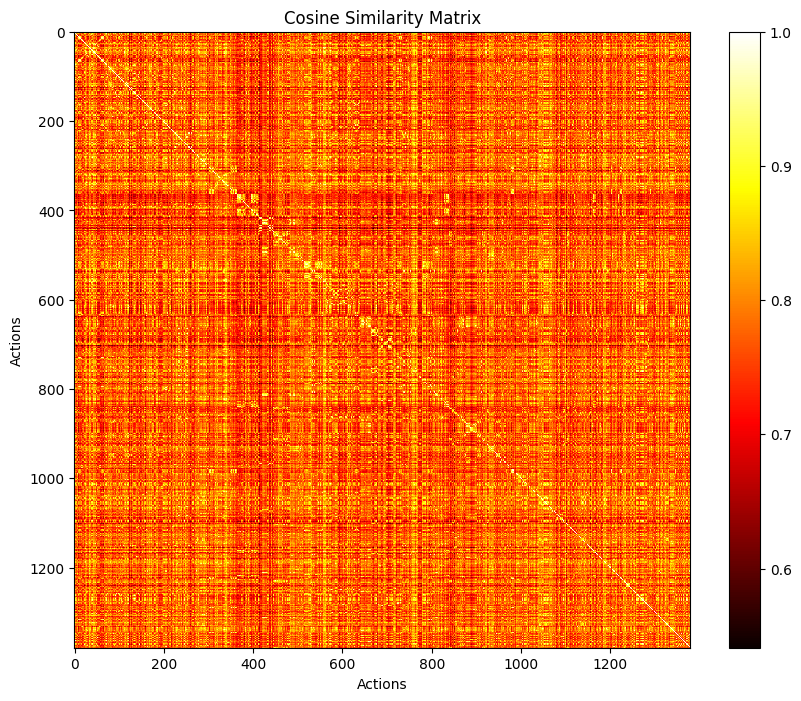

In [32]:
import torch

import matplotlib.pyplot as plt

# 计算余弦相似度
cosine_sim = torch.nn.functional.cosine_similarity(embeddings.unsqueeze(1), embeddings.unsqueeze(0), dim=-1)

# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
plt.imshow(cosine_sim.cpu().numpy(), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Cosine Similarity Matrix')
plt.xlabel('Actions')
plt.ylabel('Actions')
plt.show()

In [33]:
# 找到大于阈值的动作对
threshold = 0.8
similar_pairs = []
for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
        if cosine_sim[i, j] > threshold:
            similar_pairs.append((lines[i], lines[j], cosine_sim[i, j].item()))

In [34]:
similar_pairs.sort(key=lambda x: x[2], reverse=True)
similar_pairs

[('position screw on chassis',
  'position screw on chassis part',
  0.9958592057228088),
 ('screw chassis with screwdriver',
  'screw chassis with screwdriver bit',
  0.9955834746360779),
 ('screw clamp with screwdriver',
  'screw clamp with screwdriver bit',
  0.9951615333557129),
 ('screw rear roof with screwdriver',
  'screw rear roof with screwdriver bit',
  0.9949086904525757),
 ('screw lid with screwdriver',
  'screw lid with screwdriver bit',
  0.9948424100875854),
 ('position screw on water tank',
  'position screw on water tank part',
  0.9947658777236938),
 ('screw rear base with screwdriver',
  'screw rear base with screwdriver bit',
  0.9944905042648315),
 ('screw rear body with screwdriver',
  'screw rear body with screwdriver bit',
  0.9944279789924622),
 ('screw interior with screwdriver',
  'screw interior with screwdriver bit',
  0.9940947890281677),
 ('screw spare wheel with screwdriver',
  'screw spare wheel with screwdriver bit',
  0.9940733909606934),
 ('unscrew c